# Clone the repo

In [ ]:
# # Clone the entire repo.
# !git clone -b master --single-branch https://github.com/NewLuminous/Zalo-Vietnamese-Wiki-QA.git zaloqa
# %cd zaloqa

# Install & load libraries

In [1]:
import modeling
import transforming
import evaluating
from modeling import logit
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# To reload a module while in the interactive mode
import importlib
importlib.reload(modeling)

<module 'modeling' from 'D:\\NLP\\Zalo-Vietnamese-Wiki-QA\\modeling\\__init__.py'>

# Load data

In [2]:
from utils import data_loading

zalo_data = data_loading.load()
zalo_data

,question,answer,label
0,Quang Hải giành được chức vô địch U21 quốc gia...,"Năm 2013 , Nguyễn Quang Hải giành chức vô địch...",True
1,Quang Hải giành được chức vô địch U21 quốc gia...,"Sau chức vô địch U-21 quốc gia 2013 , Nguyễn Q...",True
2,Quang Hải giành được chức vô địch U21 quốc gia...,Anh bắt đầu gia nhập lò đào tạo trẻ Hà Nội T&T...,False
3,Quang Hải giành được chức vô địch U21 quốc gia...,"Năm 2011 , Nguyễn Quang Hải mới 14 tuổi được g...",False
4,Mỗi hiệp bóng đá kéo dài bao lâu,Một trận đấu bóng đá thông thường có hai hiệp ...,True
...,...,...,...
18103,Thành phố nào là thủ đô của Costa Rica,San José (tiếng Tây Ban Nha: San José; ) là th...,True
18104,Thành phố nào là thủ đô của Costa Rica,Vì Costa Rica có địa hình đa dạng nhiều núi no...,True
18105,Thành phố nào là thủ đô của Costa Rica,"Với địa vị là thủ đô, San José là nơi đặt trụ ...",True
18106,Thành phố nào là thủ đô của Costa Rica,Santa Teresa là một thị xã nhỏ ở tỉnh Puntaren...,True


# Train & evaluate

In [3]:
from sklearn.model_selection import train_test_split

X = zalo_data.drop(columns=['label'])
y = zalo_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [4]:
extra_data = data_loading.load(['mailong25'])
X_train = X_train.append(extra_data.drop(columns=['label']))
y_train = y_train.append(extra_data['label'])
extra_data

,question,answer,label
0,Ai là thủ tướng Ấn Độ hiện tại,Thủ tướng Ấn Độ sắp sang Mỹ gặp ông Trump mua ...,False
1,Ai là thủ tướng Ấn Độ hiện tại,Narendra Damodardas Modi ( tiếng Gujarat : નરે...,True
2,Ai là thủ tướng Ấn Độ hiện tại,- Google hôm 3/6 đã xin lỗi Thủ tướng Ấn Độ Na...,True
3,Ai là thủ tướng Ấn Độ hiện tại,thủ tướng thăm Ấn Độ Nguyễn Xuân Phúc ASEAN th...,False
4,Ai là thủ tướng Ấn Độ hiện tại,"Tin tức về chủ đề "" Thủ tướng Ấn Độ Narendra M...",True
...,...,...,...
3449,Người được mệnh danh bà chúa thơ nôm là ai,Bốn chữ BÀ CHÚA THƠ NÔM ở đầu trang chẵn và nố...,False
3450,Người được mệnh danh bà chúa thơ nôm là ai,"Ai là người được mệnh danh là "" Bà Chúa thơ Nô...",False
3451,Người được mệnh danh bà chúa thơ nôm là ai,Câu 1 : Ai được mệnh danh là bà chúa thơ Nôm ?,False
3452,Người được mệnh danh bà chúa thơ nôm là ai,"Hồ Xuân Hương - Ai mệnh danh là "" Bà chúa thơ ...",False


## LogisticRegression + CountVectorizer

In [6]:
model = modeling.get_model('logit')(vectorizer='count', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
print('Accuracy:', evaluating.get_accuracy(y_test, y_pred))
evaluating.print_classification_report(y_test, y_pred)

Accuracy: 0.7040309221424628
Classification report:
               precision    recall  f1-score   support

       False       0.77      0.81      0.79      1234
        True       0.54      0.47      0.50       577

    accuracy                           0.70      1811
   macro avg       0.65      0.64      0.65      1811
weighted avg       0.69      0.70      0.70      1811



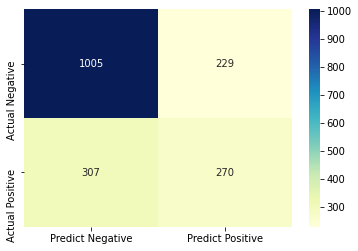

In [8]:
evaluating.plot_confusion_matrix(y_test, y_pred)

## LogisticRegression + TfidfVectorizer

In [9]:
model = modeling.get_model('logit')(vectorizer='tfidf', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [10]:
print('Accuracy:', evaluating.get_accuracy(y_test, y_pred))
evaluating.print_classification_report(y_test, y_pred)

Accuracy: 0.7112092766427388
Classification report:
               precision    recall  f1-score   support

       False       0.74      0.89      0.81      1234
        True       0.58      0.33      0.42       577

    accuracy                           0.71      1811
   macro avg       0.66      0.61      0.61      1811
weighted avg       0.69      0.71      0.68      1811



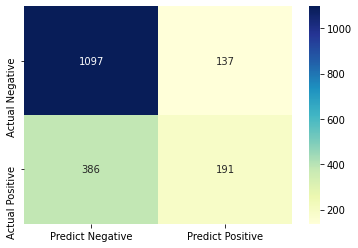

In [11]:
evaluating.plot_confusion_matrix(y_test, y_pred)

## LogisticRegression + Word2Vec

In [5]:
model = modeling.get_model('logit')(vectorizer='word2vec', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [6]:
print('Accuracy:', evaluating.get_accuracy(y_test, y_pred))
evaluating.print_classification_report(y_test, y_pred)

Accuracy: 0.6454997239094423
Classification report:
               precision    recall  f1-score   support

       False       0.74      0.74      0.74      1234
        True       0.44      0.44      0.44       577

    accuracy                           0.65      1811
   macro avg       0.59      0.59      0.59      1811
weighted avg       0.64      0.65      0.64      1811



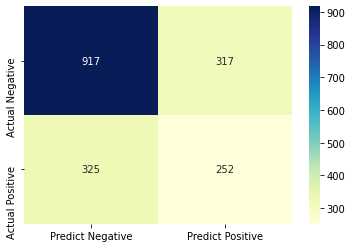

In [7]:
evaluating.plot_confusion_matrix(y_test, y_pred)

# CRNN

In [7]:
model = modeling.get_model('crnn')()
model.fit(X_train, y_train)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, 50)]   0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, None, 400)    100400      input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, None, 50)]   0                                            
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, None, 400)    0           conv1d_1[0][0]                   
_______________________________________________________________________________________

KeyboardInterrupt: 

In [8]:
y_pred = model.predict(X_test)

In [9]:
print('Accuracy:', evaluating.get_accuracy(y_test, y_pred))
evaluating.print_classification_report(y_test, y_pred)

Accuracy: 0.6813914964108228
Classification report:
               precision    recall  f1-score   support

       False       0.68      1.00      0.81      1234
        True       0.00      0.00      0.00       577

    accuracy                           0.68      1811
   macro avg       0.34      0.50      0.41      1811
weighted avg       0.46      0.68      0.55      1811



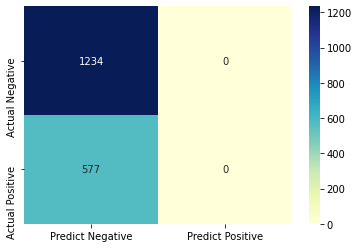

In [10]:
evaluating.plot_confusion_matrix(y_test, y_pred)

# CRNN + Attention

In [5]:
model = modeling.get_model('crnn-attention')()
model.fit(X_train, y_train)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, 50)]   0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, None, 128)    32128       input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, None, 128)    0           conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, None, 128)    82048       max_pooling1d[0][0]              
_______________________________________________________________________________________

KeyboardInterrupt: 

In [6]:
y_pred = model.predict(X_test)

In [7]:
print('Accuracy:', evaluating.get_accuracy(y_test, y_pred))
evaluating.print_classification_report(y_test, y_pred)

Accuracy: 0.6813914964108228
Classification report:
               precision    recall  f1-score   support

       False       0.68      1.00      0.81      1234
        True       0.00      0.00      0.00       577

    accuracy                           0.68      1811
   macro avg       0.34      0.50      0.41      1811
weighted avg       0.46      0.68      0.55      1811



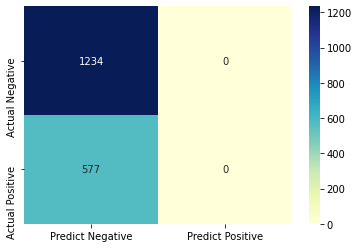

In [8]:
evaluating.plot_confusion_matrix(y_test, y_pred)